In [39]:
# Import all libraries:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
# Analyze all csv data:
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [5]:
# Show the length of the data set:
print(len(df))

96


In [6]:
# The data is 96 rows long.  Now lets explore the different data types:
# Find the number of different years:
unique_years = df.Year.unique()
print(unique_years)

# Find the number of unique countries:
unique_countries = df.Country.unique()
print(unique_countries)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [7]:
# Rename column name:
df = df.rename({'Life expectancy at birth (years)' : 'life_expectancy'}, axis = 'columns')
df.head()

,Country,Year,life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


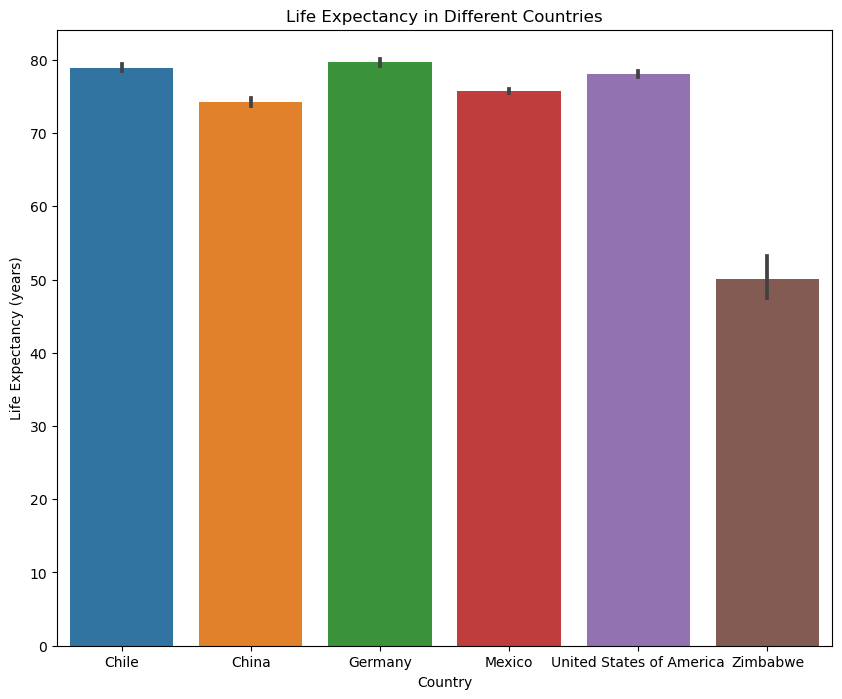

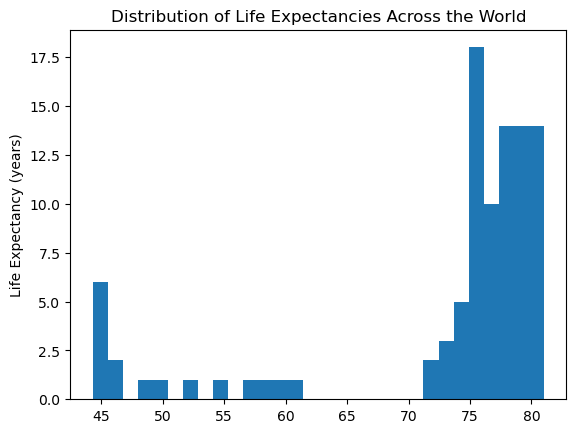

In [80]:
# Data is clean now. Now lets plot a bar graph between country and life expectancy to understand the general statistics between these variables.
plt.figure(figsize = (10, 8))
ax = plt.subplot()
sns.barplot(x = df.Country, y = df.life_expectancy)
plt.ylabel('Life Expectancy (years)')
plt.title('Life Expectancy in Different Countries')
plt.show()

plt.hist(df.life_expectancy, bins = 30)
plt.ylabel('Life Expectancy (years)')
plt.title('Distribution of Life Expectancies Across the World')
plt.show()

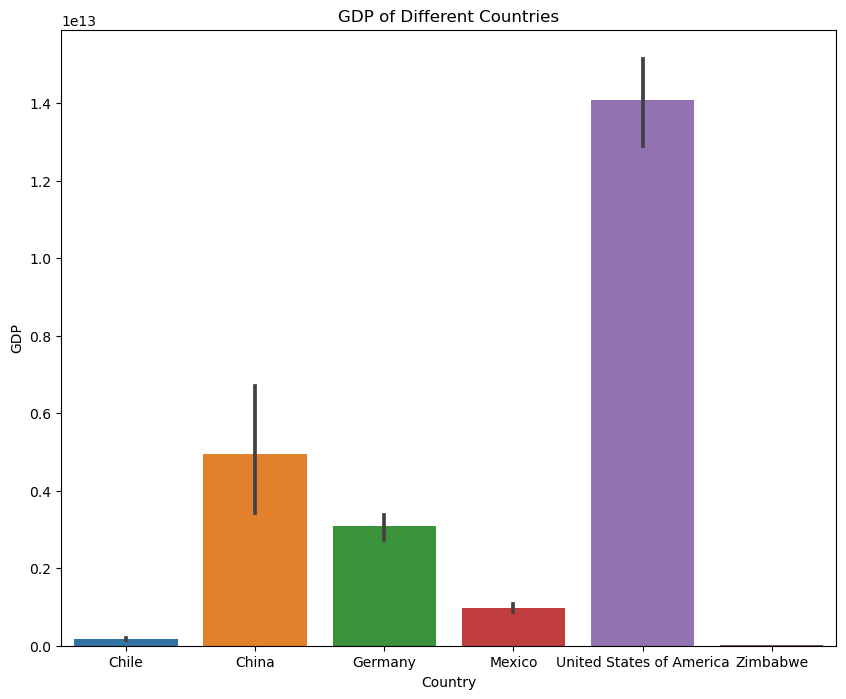

In [81]:
# From analyzing the data we can tell that Zimbabwe has the lowest life expectancy.  Lets see if the GDP factors into this observation:
plt.figure(figsize = (10, 8))
ax = plt.subplot()
sns.barplot(x = df.Country, y = df.GDP)
plt.title('GDP of Different Countries')
plt.ylabel('GDP')
plt.show()

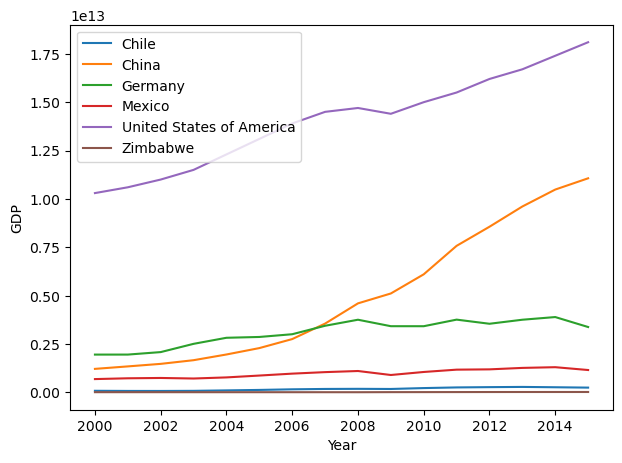

In [34]:
# It appears that the US has a massive GDP compared to all of the other countries.  However, it does not have the highest life expectancy of all of the countries.
# Analyze the trend in GDP for all countries:
plt.figure(figsize = (7, 5))
ax = plt.subplot()
sns.lineplot(x = df.Year, y = df.GDP, hue = df.Country)
plt.legend(loc = 'upper left')
plt.show()

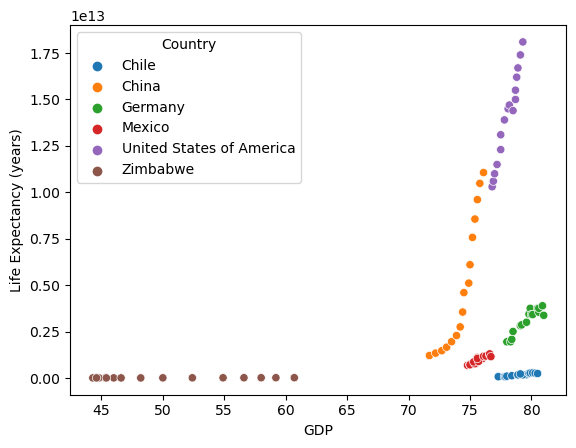

In [44]:
# It appears that the US and China have considerable increases in their GDP, with all of the other countries' GDP being relatively stagnant.
# Now we will see if there is a relationship between GDP and life expectancy.

sns.scatterplot(x = df.life_expectancy, y = df.GDP, hue = df.Country)
plt.xlabel('GDP')
plt.ylabel('Life Expectancy (years)')
plt.show()


In [42]:
# Now we will compute the correlation coefficient between the two variables:
# It appears from the graph that there is a positive correlation between GDP and the life expectancy of a country.

correlation, p = pearsonr(df.life_expectancy, df.GDP)
print(correlation)

0.34320674844915605


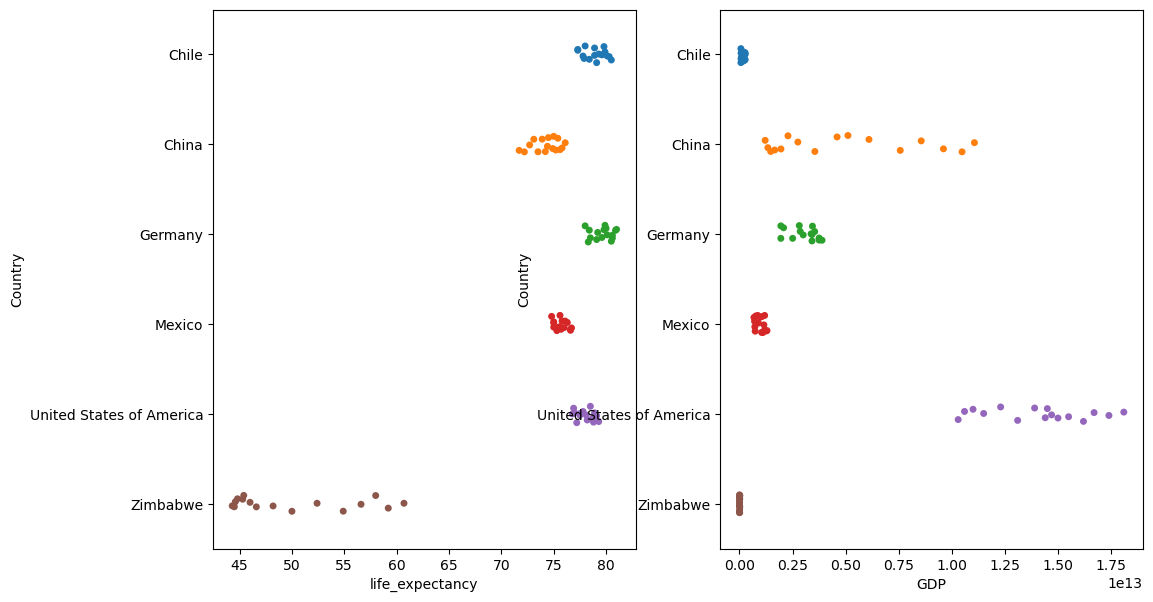

In [63]:
# It appears that the correlation coefficient between the GDP and life expectancy of a country is 0.34.
# This entails that there exists a somewhat positive correlation between these two quantitative variables.

life_US = df.life_expectancy[df.Country == 'United States of America']
life_zim = df.life_expectancy[df.Country == 'Zimbabwe']
life_chile = df.life_expectancy[df.Country == 'Chile']
life_germany = df.life_expectancy[df.Country == 'Germany']
life_china = df.life_expectancy[df.Country == 'China']
life_mexico = df.life_expectancy[df.Country == 'Mexico']


# Now lets visualize the relationship between these two variables through the means of box plots:
plt.figure(figsize = (12, 7))
plt.subplot(1, 2, 1)
sns.stripplot(x = 'life_expectancy', y = 'Country', data = df)

plt.subplot(1, 2, 2)
sns.stripplot(x = 'GDP', y = 'Country', data = df)
plt.show()


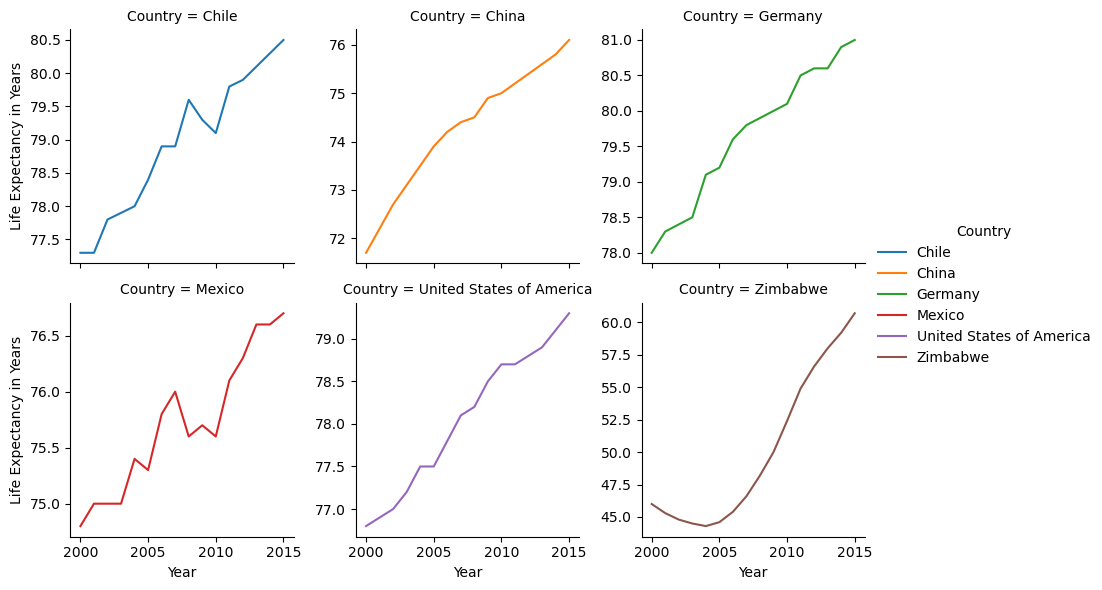

In [72]:
# The detail that is captured in this shows the relative relationship of each data point to each other.
# For example, the density of data points is represented by the two graphs.

# Deeper analysis of life expectancy over time:
individual_graphs = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

individual_graphs = (individual_graphs.map(sns.lineplot,"Year","life_expectancy").add_legend().set_axis_labels("Year","Life Expectancy in Years"))



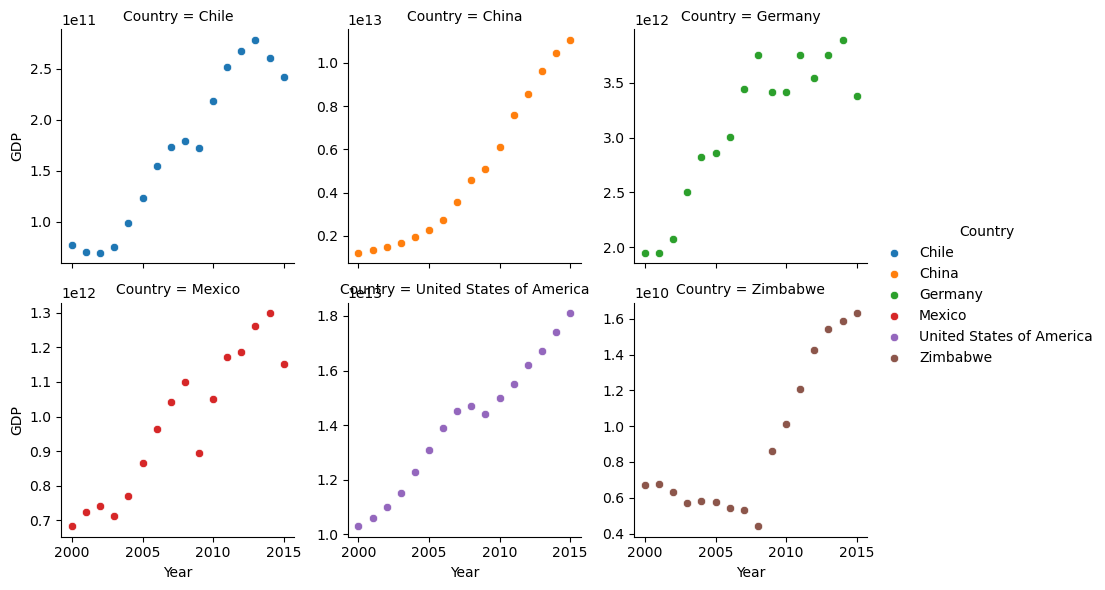

In [76]:
# We can speculate the life expectancy and GDP of a country based on the fluctuations of the life expectancy over time.
# For example, Mexico has a more erratic and rough increase compared to China.

# Now comparing back to the earlier scatterplot:

individual_graphs = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

individual_graphs = (individual_graphs.map(sns.scatterplot,"Year","GDP").add_legend().set_axis_labels("Year","GDP"))



In [ ]:
# Comparing the two individual scatter plot graphs of GDP and life expectancy, the fluctuations in the graph between the two variables are consistent.
# For example, both of China's GDP and life expectancy graphs are smooth, while Mexico's are erratic.

# Conclusions:
# - Zimbabwe had the highest life expectancy increase, along with a relatively high GDP increase through the past decade.
# - Over time, GDP had increased throughout all countries, as well as the countries' life expectancies.
# - China had the highest GDP increase.
# - There is a positive correlation between GDP and life expectancy in a given country.
# - Zimbabwe's low life expectancy, hence, could be correlated with its low GDP.
# - The distribution of life expectancies were left-skewed, mainly because of Zimbabwe's lower life expectancy.